# This jupyter notebook is prepared by "Yuyang Zhang".

### 1. Run the block below to upload the dataset. (Note that the file list gets refreshed every time your runtime is disconnected. Simply run this when you return to upload the file again using the files API. Once you run, it should wait for you to upload the file. (1pt) 

In [1]:
from google.colab import files
uploaded = files.upload()

Saving startup_info_.csv to startup_info_.csv


### 2. Import numpy, pandas, matplotlib.pyplot and seaborn packages. (2pt)
###### If you need additional packages, you can import it on the go in any code-block below.

In [2]:
#TODO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler

### 3. Import the dataset into a pandas dataframe. Then report how many rows and columns are present in the dataset. (2pt)

In [3]:
#TODO
df = pd.read_csv('/content/startup_info_.csv')
df.shape

(923, 28)

### 4. Call the describe method to see summary statistics of the numerical attribute columns. (1pt)

In [4]:
#TODO
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,16.000000,1.000000


### 5.1 List all attribute columns (1pt)

In [5]:
#TODO
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'category_code',
       'object_id', 'avg_participants', 'is_top500', 'status'],
      dtype='object')

## 5.2 The "Unnamed: 0","Unnamed: 6", "state_code.1" and "object_id" feature columns are not useful. Drop them in-place. (1pt) 

In [6]:
#TODO
df.drop(columns=['Unnamed: 0', 'Unnamed: 6', 'state_code.1', 'object_id'], inplace=True)
df.columns

Index(['state_code', 'latitude', 'longitude', 'zip_code', 'id', 'city', 'name',
       'labels', 'founded_at', 'closed_at', 'first_funding_at',
       'last_funding_at', 'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'category_code',
       'avg_participants', 'is_top500', 'status'],
      dtype='object')

## 6.1 Show all the numeric columns and save it to a new dataframe. (2pt)

In [7]:
#TODO
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['latitude', 'longitude', 'labels', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'avg_participants', 'is_top500'],
      dtype='object')

## 6.2 Plot distributions of the numeric columns using histogram and record the skew of each distribution. (Note: positive value = right skewed, negative value = left skewed) (4pt)

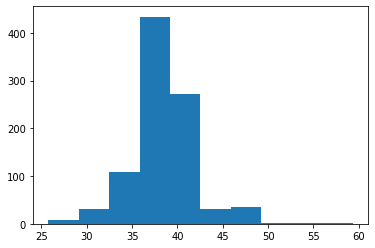

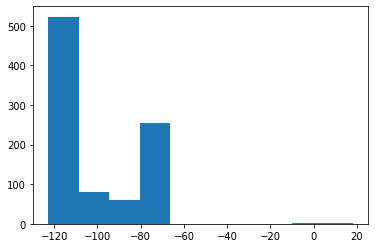

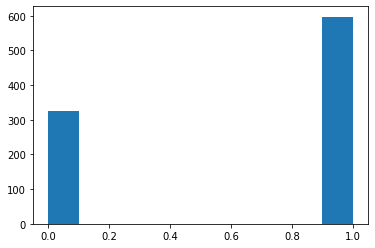

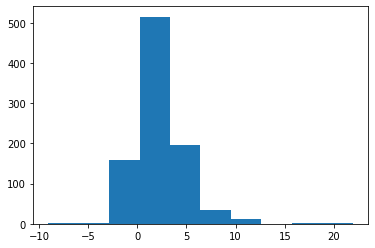

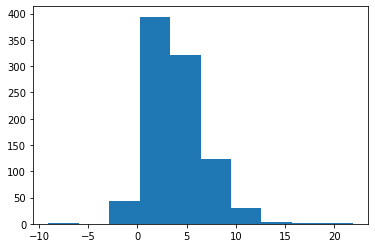

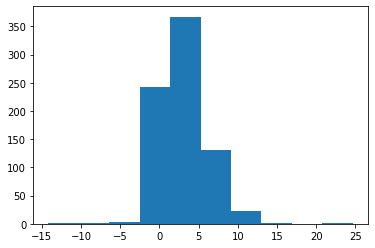

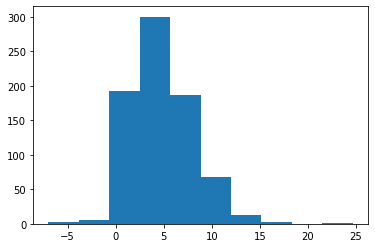

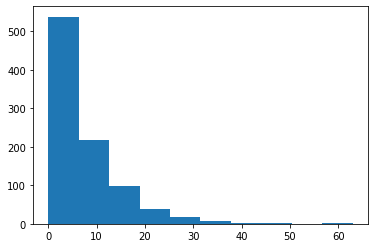

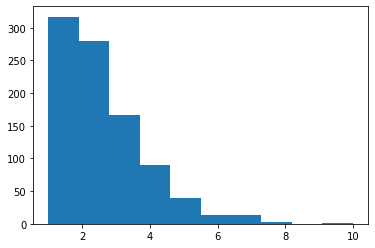

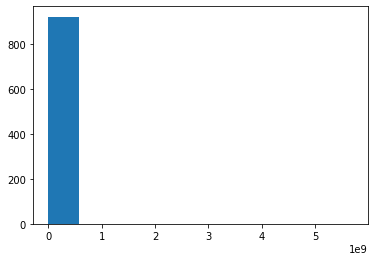

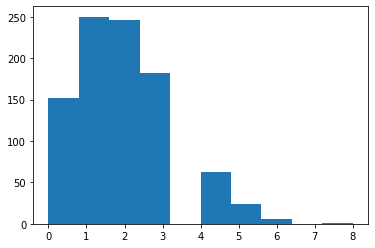

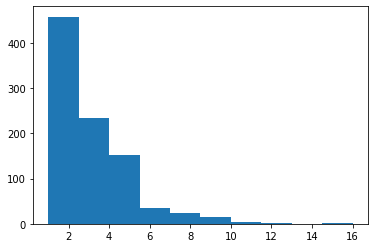

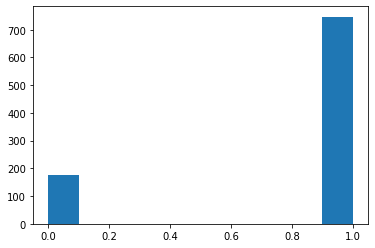

latitude                     0.309298
longitude                    0.873708
labels                      -0.615290
age_first_funding_year       2.104001
age_last_funding_year        1.092075
age_first_milestone_year     0.944468
age_last_milestone_year      0.711934
relationships                2.329961
funding_rounds               1.356917
funding_total_usd           29.152461
milestones                   0.577378
avg_participants             1.767554
is_top500                   -1.577343
dtype: float64

In [8]:
#TODO
plt.hist(numeric_features['latitude'])
plt.show()
plt.hist(numeric_features['longitude'])
plt.show()
plt.hist(numeric_features['labels'])
plt.show()
plt.hist(numeric_features['age_first_funding_year'])
plt.show()
plt.hist(numeric_features['age_last_funding_year'])
plt.show()
plt.hist(numeric_features['age_first_milestone_year'])
plt.show()
plt.hist(numeric_features['age_last_milestone_year'])
plt.show()
plt.hist(numeric_features['relationships'])
plt.show()
plt.hist(numeric_features['funding_rounds'])
plt.show()
plt.hist(numeric_features['funding_total_usd'])
plt.show()
plt.hist(numeric_features['milestones'])
plt.show()
plt.hist(numeric_features['avg_participants'])
plt.show()
plt.hist(numeric_features['is_top500'])
plt.show()
numeric_features.skew()

## 7. Show all the categorical columns and save it to a new dataframe. (2pt)

In [9]:
#TODO
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

<ipython-input-9-e51306b70949>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include=[np.object])


Index(['state_code', 'zip_code', 'id', 'city', 'name', 'founded_at',
       'closed_at', 'first_funding_at', 'last_funding_at', 'category_code',
       'status'],
      dtype='object')

## 8. Examine missing values (2+2+3=7pt)

### 8.1 Show a list with column wise count of missing values and display the list in count wise descending order.

In [10]:
#TODO
nulls = df.isnull().sum().to_frame('nulls')
nulls.sort_values("nulls", inplace = True, ascending = False)
nulls

,nulls
closed_at,588
age_last_milestone_year,152
age_first_milestone_year,152
state_code,0
age_last_funding_year,0
is_top500,0
avg_participants,0
category_code,0
milestones,0
funding_total_usd,0


### 8.2 Show columnwise percentage of missing values.

In [11]:
#TODO
percentage = df.isnull().mean()*100
percentage = percentage.to_frame("nulls")
percentage.sort_values("nulls", inplace = True)
for index, row in percentage.iterrows():
  print(index, row[0])

state_code 0.0
avg_participants 0.0
category_code 0.0
milestones 0.0
funding_total_usd 0.0
funding_rounds 0.0
relationships 0.0
age_last_funding_year 0.0
age_first_funding_year 0.0
is_top500 0.0
last_funding_at 0.0
founded_at 0.0
labels 0.0
name 0.0
city 0.0
id 0.0
zip_code 0.0
longitude 0.0
latitude 0.0
first_funding_at 0.0
status 0.0
age_first_milestone_year 16.468039003250272
age_last_milestone_year 16.468039003250272
closed_at 63.705308775731304


### 8.3 Display a bar plot to visualize only the columns with missing values and their percentage count.

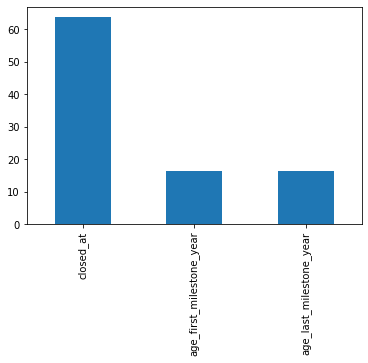

In [13]:
#TODO
miss = df.isnull().sum()
missing = 100 * miss / len(df)
missing = missing[missing>0]
missing.plot.bar()

## 9. Label Encoding : Copy the dataframe to a new one. Then using scikitlearn's Label Encoder, transform the "status" column to 0-1. (5pt)

In [14]:
#TODO
newdf = df
le = LabelEncoder()
newdf.status = le.fit_transform(df.status)
newdf.head

<bound method NDFrame.head of     state_code   latitude   longitude zip_code       id           city  \
0           CA  42.358880  -71.056820    92101   c:6669      San Diego   
1           CA  37.238916 -121.973718    95032  c:16283      Los Gatos   
2           CA  32.901049 -117.192656    92121  c:65620      San Diego   
3           CA  37.320309 -122.050040    95014  c:42668      Cupertino   
4           CA  37.779281 -122.419236    94105  c:65806  San Francisco   
..         ...        ...         ...      ...      ...            ...   
918         CA  37.740594 -122.376471    94107  c:21343  San Francisco   
919         MA  42.504817  -71.195611     1803  c:41747     Burlington   
920         CA  37.408261 -122.015920    94089  c:31549      Sunnyvale   
921         CA  37.556732 -122.288378    94404  c:33198  San Francisco   
922         CA  37.386778 -121.966277    95054  c:26702    Santa Clara   

                     name  labels founded_at  closed_at  ...  \
0             Ban

## 10. Correlation: Use seaborn's heatmap to visualize the correlation between numeric features. (3pt)

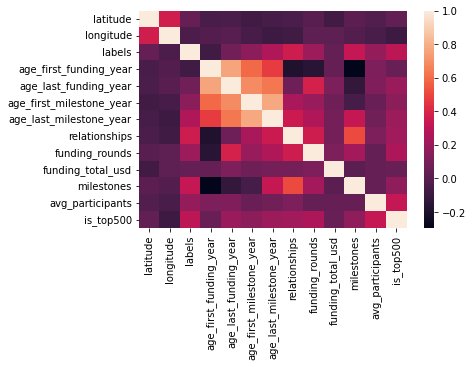

In [15]:
#TODO
sns.heatmap(numeric_features.corr())

## 11.1 Use seaborn's countplot to visualize relationship between "*state_code*" and "*labels*". Comment on which state produced majority of successful startups (3pt)

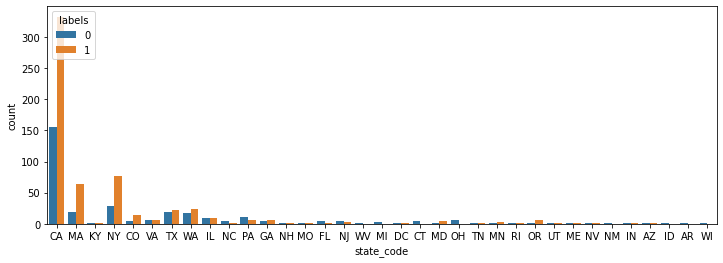

In [16]:
#TODO
fig = plt.figure(figsize=(12,4))
sns.countplot(x = df['state_code'], hue = df['labels'], data = df)
plt.show()
#CA produced majority of successful startups

## 11.2 Use seaborn's countplot to visualize relationship between "*milestones*" and "*labels*". Comment on which milestone made the statistically highest number of successful startups (3pt)

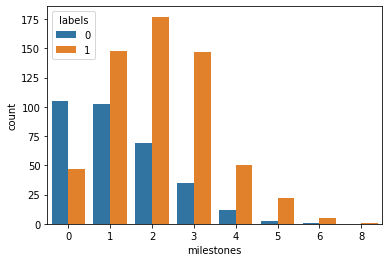

In [17]:
#TODO
sns.countplot(x = df['milestones'], hue = df['labels'], data = df)
plt.show()
#2 milestones made the statistically highest number of successful startups

## 12. Drop features with duplicate values in-place, then show dataframe's new shape. (1pt)

In [18]:
#TODO
df.drop_duplicates(inplace=True)
df.shape

(923, 24)

## 13. From correlation heatmap above, comment on which feature has the highest correlation with "*funding_rounds*". Visualize a scatterplot with that and "*funding_rounds*". (3+3 = 6pt)

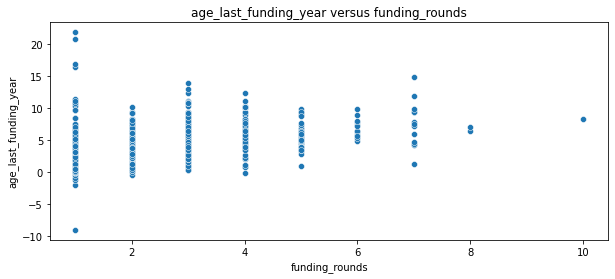

In [19]:
#TODO
#The 'age_last_funding_year' has the highest correlation with 'funding_rounds'
plt.figure(figsize = (10,4))
sns.scatterplot(data = df, x = 'funding_rounds', y = 'age_last_funding_year').set(title = 'age_last_funding_year versus funding_rounds')
plt.show()

## 14. Show boxplots for the numeric features to detect outliers. (4pt)

<ipython-input-20-c2698eadfc1f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf2[i] = nf2[i] / nf2[i].abs().max()


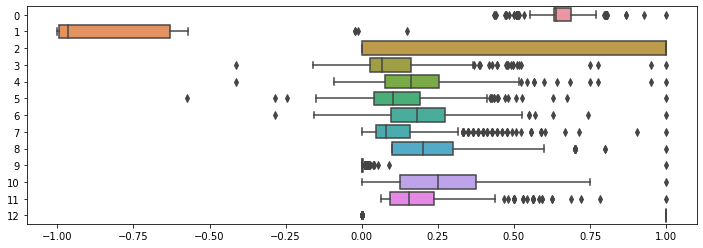

"\nsns.boxplot(numeric_features['latitude'])\nplt.show()\nsns.boxplot(numeric_features['longitude'])\nplt.show()\nsns.boxplot(numeric_features['labels'])\nplt.show()\nsns.boxplot(numeric_features['age_first_funding_year'])\nplt.show()\nsns.boxplot(numeric_features['age_last_funding_year'])\nplt.show()\nsns.boxplot(numeric_features['age_first_milestone_year'])\nplt.show()\nsns.boxplot(numeric_features['age_last_milestone_year'])\nplt.show()\nsns.boxplot(numeric_features['relationships'])\nplt.show()\nsns.boxplot(numeric_features['funding_rounds'])\nplt.show()\nsns.boxplot(numeric_features['funding_total_usd'])\nplt.show()\nsns.boxplot(numeric_features['milestones'])\nplt.show()\nsns.boxplot(numeric_features['avg_participants'])\nplt.show()\nsns.boxplot(numeric_features['is_top500'])\nplt.show()\n"

In [20]:
#TODO
fig = plt.figure(figsize=(12,4))
nf2 = numeric_features
for i in nf2:
  nf2[i] = nf2[i] / nf2[i].abs().max()
sns.boxplot(data = [nf2['latitude'],nf2['longitude'],nf2['labels'],
      nf2['age_first_funding_year'],nf2['age_last_funding_year'],
      nf2['age_first_milestone_year'],nf2['age_last_milestone_year'],
      nf2['relationships'],nf2['funding_rounds'],
      nf2['funding_total_usd'],nf2['milestones'],nf2['avg_participants'],
      nf2['is_top500']], orient = "h")
plt.show()



"""
sns.boxplot(numeric_features['latitude'])
plt.show()
sns.boxplot(numeric_features['longitude'])
plt.show()
sns.boxplot(numeric_features['labels'])
plt.show()
sns.boxplot(numeric_features['age_first_funding_year'])
plt.show()
sns.boxplot(numeric_features['age_last_funding_year'])
plt.show()
sns.boxplot(numeric_features['age_first_milestone_year'])
plt.show()
sns.boxplot(numeric_features['age_last_milestone_year'])
plt.show()
sns.boxplot(numeric_features['relationships'])
plt.show()
sns.boxplot(numeric_features['funding_rounds'])
plt.show()
sns.boxplot(numeric_features['funding_total_usd'])
plt.show()
sns.boxplot(numeric_features['milestones'])
plt.show()
sns.boxplot(numeric_features['avg_participants'])
plt.show()
sns.boxplot(numeric_features['is_top500'])
plt.show()
"""

## 15. Summary and Discussion: Mention what additional steps are required to use this dataset in a binary classifier. Eg: any column to remove, any record to remove, any distribution to rebalance, any features to be joined together to generate new feature etc. (2pt)

Several additional steps:
1. 'latitude' and 'longitude' can be combined as one feature
2. Use Simple Random Sampling to extract key data
3. Use k means to cluster dataset
4. Use normalization to compress values into a small range